In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss as raices
from IPython.display import clear_output
from PySections import *
import quadpy

# Punto 2

In [2]:
from PySections import *

desp = np.array([0,0,3*10**-3,0,0,2*10**-3])
sh = 0.05
qy = [[1100],[435],[435]]
I = 250000
A = 1
E = 1
l = 8.5


W = 12.5


estructura = Estructura()

acero = Material('Acero', E, 0.2, 9.9*10**-6, 23.54,sh=sh)
seccion = Seccion('Elementos', TipoSeccion.GENERAL, [A,I], acero,qy=qy)

estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=l,y=0,fix=[False,False,False])
estructura.agregarElemento(nodoInicial=0,nodoFinal=1,seccion=seccion,tipo=Tipo.UNO,defCortante=False)
estructura.agregarCargaDistribuida(WY=-W, elemento=-1)

for i in estructura.elementos:
    i.Ue = desp[np.ix_(i.diccionario)]

KLL,P = estructura.determinacionDeEstado()

print('\nVector {v}:')
print(estructura.elementos[0].v)
print('\nVector {q}:')
print(estructura.elementos[0].q)
print('\nMatriz [Kb]:')
print(estructura.elementos[0].kb)
print('\nVector {ve}:')
print(estructura.elementos[0].ve)
print('\nVector {vp}:')
print(estructura.elementos[0].vp)
print('\nVector {v0}:')
print(estructura.elementos[0].v0)
#estructura.solucionar(True,True)

Error q: 0.004339668361730001 iteracion 2
Error q: 0.012562847222222236 iteracion 3
Error q: 1.3904866443919908e-17 iteracion 4

Vector {v}:
[[0.   ]
 [0.003]
 [0.002]]

Vector {q}:
[[  0.        ]
 [442.73362688]
 [284.94677668]]

Matriz [Kb]:
[[1.17647059e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.20793434e+03 4.10396717e+03]
 [0.00000000e+00 4.10396717e+03 9.02872777e+04]]

Vector {ve}:
[[0.        ]
 [0.00340295]
 [0.00072057]]

Vector {vp}:
[[0.        ]
 [0.00087648]
 [0.        ]]

Vector {v0}:
[[ 0.        ]
 [-0.00127943]
 [ 0.00127943]]


# Punto 3

In [3]:
from PySections import *
from IPython.display import clear_output
desp = np.array([0.2056,-0.0055,-0.0409,0.2029,-0.0058,-0.0305,0.2024,-0.0057,0,0,0,0,0,0,0,0,0,0]) #Desplazamietos
    
sh = 0.0345

qy = [[9*10**9],[187],[187]]

IV = 0.00048699076842
AV = 0.01077417

IC = 0.00044537
AC = 0.02277415

IR = 1
AR = 0.00064516

E = 200000000

l = 8
ll = 4

W = 10

estructura = Estructura()

acero = Material('Acero', E, 0.2, 9.9*10**-6,1,sh=sh)


VIGA1 = Seccion('Elementos', TipoSeccion.GENERAL, [AV,IV], acero, qy=qy)
RIOSTRA = Seccion('Elementos', TipoSeccion.GENERAL, [AR,IR], acero, qy=[[187],[0],[0]])
COLUMNA = Seccion('Elementos', TipoSeccion.GENERAL, [AC,IC], acero)

estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=l,y=0,fix=[False,False,False])
estructura.agregarNodo(x=2*l,y=0,fix=[False,False,False])

estructura.agregarNodo(x=0,y=ll)
estructura.agregarNodo(x=l,y=ll)
estructura.agregarNodo(x=2*l,y=ll)

estructura.agregarElemento(nodoInicial=0,nodoFinal=3,seccion=COLUMNA,tipo=Tipo.DOS,defCortante=False)

estructura.agregarElemento(nodoInicial=1,nodoFinal=4,seccion=COLUMNA,tipo=Tipo.DOS,defCortante=False)

estructura.agregarElemento(nodoInicial=2,nodoFinal=5,seccion=COLUMNA,tipo=Tipo.CUATRO,defCortante=False)


#
estructura.agregarElemento(nodoInicial=3,nodoFinal=4,seccion=VIGA1,tipo=Tipo.UNO,defCortante=False)

estructura.agregarElemento(nodoInicial=4,nodoFinal=5,seccion=VIGA1,tipo=Tipo.TRES,defCortante=False)

estructura.agregarElemento(nodoInicial=0,nodoFinal=4,seccion=RIOSTRA,tipo=Tipo.CUATRO,defCortante=False)

estructura.agregarElemento(nodoInicial=1,nodoFinal=5,seccion=RIOSTRA,tipo=Tipo.CUATRO,defCortante=False)

estructura.agregarCargaDistribuida(WY=-W, elemento=3)
estructura.agregarCargaDistribuida(WY=-W, elemento=4)

estructura.agregarCargaNodo(nodo=3, px=100, py=-450)
estructura.agregarCargaNodo(nodo=4, py=-450)
estructura.agregarCargaNodo(nodo=5, py=-450)

estructura.solucionar(True,False)

for i in estructura.elementos:
    i.Ue = desp[np.ix_(i.diccionario)]
KLL, PL = estructura.determinacionDeEstado()
clear_output()
import os
cwd = os.getcwd()
np.savetxt(cwd+'/KLL.csv',KLL,delimiter=',')
np.savetxt(cwd+'/PL.csv',PL,delimiter=',')

## Para elementos no columnas, es decir i = [3,4,5,6]

In [4]:
i = 6
EA = estructura.elementos[i].E*estructura.elementos[i].Area
EI =  estructura.elementos[i].E*estructura.elementos[i].Inercia
l = estructura.elementos[i].Longitud
sh = 0.0345
qy = estructura.elementos[i].seccion.qy
tipo = estructura.elementos[i].Tipo
v = estructura.elementos[i].v
v0 = estructura.elementos[i].v0
sh = estructura.elementos[i].seccion.material.sh
Re,v,q,kb,ve,vp = estadoPlasticidadConcentrada(v,sh,qy,EI,l,EA,tipo,v0)
print('Vector {v}')
print(v)
print('Vector v0 {v0}')
print(v0)
print('\nMatriz [kb]')
print(np.round(kb,3))
print('\nVector {Re}')
print(Re)
print('\nVector q {q}')
print(np.round(q,3))
print('\nVector vp {vp}')
print(np.round(vp,3))
print('\nVector ve {ve}')
print(np.round(ve,3))

Error q: 0.1789839918157199 iteracion 2
Vector {v}
[[0.17898399]
 [0.        ]
 [0.        ]]
Vector v0 {v0}
[[0.]
 [0.]
 [0.]]

Matriz [kb]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Vector {Re}
[[0.]
 [0.]
 [0.]]

Vector q {q}
[[187]
 [  0]
 [  0]]

Vector vp {vp}
[[0.166]
 [0.   ]
 [0.   ]]

Vector ve {ve}
[[0.013]
 [0.   ]
 [0.   ]]


## Para elementos de columnas i = [0,1,2]

In [5]:
i = 2
EA = estructura.elementos[i].E*estructura.elementos[i].Area
EI =  estructura.elementos[i].E*estructura.elementos[i].Inercia
l = estructura.elementos[i].Longitud
sh = 0.0345
qy = estructura.elementos[i].seccion.qy
tipo = estructura.elementos[i].Tipo
v = estructura.elementos[i].v
v0 = estructura.elementos[i].v0
kb = estructura.elementos[i].kb
q = estructura.elementos[i].q
#sh = estructura.elementos[i].seccion.material.sh
#Re,v,q,kb,ve,vp = estadoPlasticidadConcentrada(v,sh,qy,EI,l,EA,tipo,v0)
print('Vector {v}')
print(v)
print('Vector v0 {v0}')
print(v0)
print('\nMatriz [kb]')
print(np.round(kb,3))
print('\nVector q {q}')
print(np.round(q,3))

Vector {v}
[[-0.00057526]
 [ 0.        ]
 [ 0.        ]]
Vector v0 {v0}
[[0.]
 [0.]
 [0.]]

Matriz [kb]
[[1138707.5       0.        0. ]
 [      0.        0.        0. ]
 [      0.        0.        0. ]]

Vector q {q}
[[-655.053]
 [   0.   ]
 [   0.   ]]


# Punto 4

In [56]:
def estadoPlasticidadDistribuida(vt, l, v0=[[0], [0], [0]],q=[[0], [0], [0]],n=5):
    vt = np.array(vt)
    v0 = np.array(v0)
    q = np.array(q)
    i = 0
    error = 1
    while error > 1*10**-10:
        v, kb, e, S = _vkb(l, q,n)
        Re = vt - v0 - v
        dq = kb @ Re
        q = q + dq
        i +=1
        error = np.max(Re)
        print('Error q: ' + format(error) + ' iteracion ' + format(i))
    return Re, v, q, kb, e, S

def _vkb(L, q, n):
    s = quadpy.line_segment.gauss_lobatto(n)
    X = (np.array(s.points)/2+1/2)*L
    W = np.array(s.weights)/2*L
    print(W)
    v = np.zeros([3, 1])
    kb = np.zeros([3, 3])
    Eg = []
    Sg = []
    for i in range(0, len(X)):
        x = X[i]
        b = np.array([[1, 0, 0], [0, x / L - 1, x / L]])
        St = b @ q
        e = np.zeros([2, 1])
        fibras = crearFibras()
        error = 1
        j = 1
        while error > 1*10**-6 and j < 30:
            S, Ks,FIG = _estadoSeccion(e, fibras)
            Rs = St - S
            de = np.linalg.pinv(Ks) @ Rs
            e = e + de
            error = np.linalg.norm(de)
            clear_output(wait=True)
            print('Error s: ' + format(error) + ' iteracion ' + format(i) + ',' + format(j))
            j += 1
        v = v + W[i] * (b.T @ e)
        kb = kb + W[i] * (b.T @ np.linalg.pinv(Ks) @ b)
        Eg.append(e)
        Sg.append(FIG)
    kb = np.linalg.pinv(kb)
    return v, kb, Eg,Sg

def _estadoSeccion(e, fibras):
    n = fibras.shape[0]
    ea = e[0][0]
    phi = e[1][0]
    ys = fibras[:, 0].reshape(n, 1)
    ai = fibras[:, 1].reshape(n, 1)

    epsilon = ea - ys * phi
    sigma, Et = _esfdeft(epsilon)
    Sm = sigma * ai
    C = (Et * ai).T[0]
    km = np.diag(C)
    As = np.array([np.zeros([n]) + 1, -ys.T[0]]).T
    S = As.T @ Sm

    Ks = As.T @ km @ As
    return S, Ks, Et

def _esfdeft(epsilon, sh=0.015,ey = 0.001725,E=200000000):  # CURVA ESFUERZO DEFORMACION
    sh = 1-sh
    et = E - sh * E * (np.abs(epsilon) > ey)
    s = et * (epsilon-ey*np.sign(epsilon)*(np.abs(epsilon) > ey)) + ey*np.sign(epsilon)*E*(np.abs(epsilon) > ey)
    return s, et


#Cambair la seccion transversar es cuestion del usuario
def crearFibras():
    tf = 1.41*2/100
    th = 1.803/100
    a = 31.24/100
    b = 9.21*3/100
    
    a1 = a*tf/2
    a2 = b*th/3
    
    d1 = tf/2
    d2 = b/3
    fibras = [[-(d2/2+d2+d1+d1/2),a1],
              [-(d2/2+d2+d1/2),a1],
              [-(d2),a2],
              [0,a2],
              [(d2),a2],
              [(d2/2+d2+d1/2),a1],
              [(d2/2+d2+d1+d1/2),a1]]
    return np.array(fibras)

vt = [[-0.001076],[0.05186],[-0.01091]]
l = 9

Re, v, q, kb, e, S = estadoPlasticidadDistribuida(vt, l, v0=[[0], [0], [0]],n=5)
print('Vector {v}')
print(v)
print('\nMatriz [kb]')
print(kb)
print('\nVector {Re}')
print(Re)
print('\nVector q {q}')
print(q)
print('\nVector e {e}')
print(np.array(e))
print('\nVector Et {Et}')
print(np.array(S))


Error s: 6.498131201576575e-19 iteracion 4,2
Error q: 4.336808689942018e-18 iteracion 5
Vector {v}
[[-0.001076]
 [ 0.05186 ]
 [-0.01091 ]]

Matriz [kb]
[[ 3.29931100e+05  7.54203438e-11 -3.60476975e-11]
 [-4.78638967e-13  2.75135060e+03  1.37567530e+03]
 [ 2.94712293e-12  1.37567530e+03  2.98521540e+04]]

Vector {Re}
[[ 4.33680869e-18]
 [-3.46944695e-17]
 [ 0.00000000e+00]]

Vector q {q}
[[-355.00586403]
 [1085.73391106]
 [ 224.68426459]]

Vector e {e}
[[[-8.98899087e-04]
  [-5.34846720e-02]]

 [[-7.85374750e-05]
  [-9.82318996e-03]]

 [[-7.85374750e-05]
  [-4.92068022e-03]]

 [[-7.85374750e-05]
  [-1.81704792e-05]]

 [[-7.85374750e-05]
  [ 2.56802711e-03]]]

Vector Et {Et}
[[[3.e+06]
  [3.e+06]
  [3.e+06]
  [2.e+08]
  [3.e+06]
  [3.e+06]
  [3.e+06]]

 [[2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]]

 [[2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]]

 [[2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]
  [2.e+08]]

 

In [60]:
L = 4.5

s = quadpy.line_segment.gauss_lobatto(5)
X = (np.array(s.points)/2+1/2)*L
W = np.array(s.weights)/2*L
print(W)
print(np.round(X,3))

[0.225 1.225 1.6   1.225 0.225]
[0.    0.777 2.25  3.723 4.5  ]


In [62]:
phis = np.array([-0.2664,-0.0123,-0.0015,0.0077,0.0463])

In [71]:
np.sum(((X/L-1)*phis)*W)

0.07197700746617224

In [2]:
def crearFibras():
    tf = 1.41*2/100
    th = 1.803/100
    a = 31.24/100
    b = 9.21*3/100
    
    a1 = a*tf/2
    a2 = b*th/3
    
    d1 = tf/2
    d2 = b/3
    fibras = [[-(d2/2+d2+d1+d1/2),a1],
              [-(d2/2+d2+d1/2),a1],
              [-(d2),a2],
              [0,a2],
              [(d2),a2],
              [(d2/2+d2+d1/2),a1],
              [(d2/2+d2+d1+d1/2),a1]]
    return np.array(fibras)
def _esfdeft(epsilon, sh=0.015,ey = 0.001725,E=200000000):  # CURVA ESFUERZO DEFORMACION
    sh = 1-sh
    et = E - sh * E * (np.abs(epsilon) > ey)
    s = et * (epsilon-ey*np.sign(epsilon)*(np.abs(epsilon) > ey)) + ey*np.sign(epsilon)*E*(np.abs(epsilon) > ey)
    return s, et
def _estadoSeccion(e, fibras):
    n = fibras.shape[0]
    ea = e[0][0]
    phi = e[1][0]
    ys = fibras[:, 0].reshape(n, 1)
    ai = fibras[:, 1].reshape(n, 1)

    epsilon = ea - ys * phi
    sigma, Et = _esfdeft(epsilon)
    Sm = sigma * ai
    print(Sm)
    C = (Et * ai).T[0]
    km = np.diag(C)
    As = np.array([np.zeros([n]) + 1, -ys.T[0]]).T
    S = As.T @ Sm
    print(As)
    Ks = As.T @ km @ As
    return S, Ks, Et
S,Ks,Et=_estadoSeccion(np.array([[-0.0028],[0.0643]]), crearFibras())

[[ 1595.23029321]
 [ 1583.24961295]
 [  579.85380398]
 [ -578.24955068]
 [ -607.75126238]
 [-1657.25092495]
 [-1669.23160521]]
[[ 1.      0.1593]
 [ 1.      0.1452]
 [ 1.      0.0921]
 [ 1.     -0.    ]
 [ 1.     -0.0921]
 [ 1.     -0.1452]
 [ 1.     -0.1593]]


In [3]:
S

array([[-754.14963308],
       [1099.92788513]])

In [44]:
ys = crearFibras()[:,0]

In [46]:
-0.0028-ys*0.0643

array([ 0.00744299,  0.00653636,  0.00312203, -0.0028    , -0.00872203,
       -0.01213636, -0.01304299])

In [49]:
Et

array([[3000000.],
       [3000000.],
       [3000000.],
       [3000000.],
       [3000000.],
       [3000000.],
       [3000000.]])

In [47]:
ys

array([-0.1593, -0.1452, -0.0921,  0.    ,  0.0921,  0.1452,  0.1593])

# Graficas Punto 4

Text(0.5, 1.0, 'Modulo Tangente')

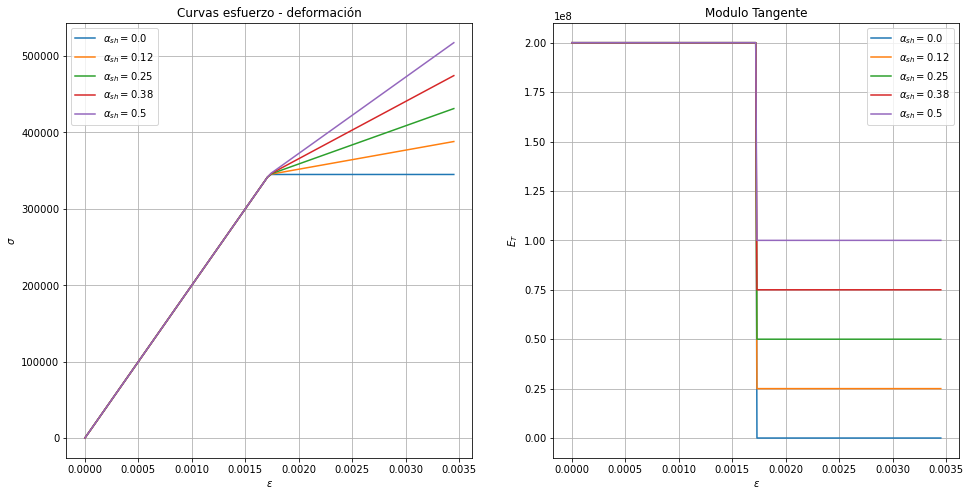

In [7]:
import numpy as np
import matplotlib.pyplot as plt
ey = 0.001725
l = []
fig,axes = plt.subplots(1,2,figsize=[16,8])
ax = axes[0]
for i in np.linspace(0,.5,5):
    _X = np.linspace(0,2*ey,100)
    _Y = _esfdeft(_X, sh=i,ey=ey)[0]
    l.append(r'$\alpha_{sh}='+format(np.round(i,2))+'$')
    ax.plot(_X,_Y)
ax.legend(l)
ax.grid()
ax.set_xlabel(r'$\varepsilon$')
ax.set_ylabel(r'$\sigma$')
ax.set_title('Curvas esfuerzo - deformación')
ax = axes[1]
for i in np.linspace(0,.5,5):
    _X = np.linspace(0,2*ey,300)
    _Y = _esfdeft(_X, sh=i,ey=ey)[1]
    l.append(r'$\alpha_{sh}='+format(np.round(i,2))+'$')
    ax.plot(_X,_Y)
ax.legend(l)
ax.grid()
ax.set_xlabel(r'$\varepsilon$')
ax.set_ylabel(r'$E_T$')
ax.set_title('Modulo Tangente')

In [4]:
from PySections import *

desp = np.array([0,-0.02219,0,-0.02898/100,0,-0.01974])
sh = 0.03
qy = [[9999999],[1013],[1013]]
I = 110717.6
A = 2877400
E = 1
l = 9


estructura = Estructura()
acero = Material('Acero', E, 0.2, 9.9*10**-6, 23.54,sh=sh)
seccion = Seccion('Elementos', TipoSeccion.GENERAL, [A,I], acero,qy=qy)

estructura.agregarNodo(x=0,y=0)
estructura.agregarNodo(x=l,y=0)
estructura.agregarElemento(nodoInicial=0,nodoFinal=1,seccion=seccion,tipo=Tipo.UNO,defCortante=False)

for i in estructura.elementos:
    i.Ue = desp[np.ix_(i.diccionario)]
KLL,P = estructura.determinacionDeEstado()

print('\nVector {v}:')
print(estructura.elementos[0].v)
print('\nVector {q}:')
print(estructura.elementos[0].q)
print('\nMatriz [Kb]:')
print(np.round(estructura.elementos[0].kb,3))
print('\nVector {ve}:')
print(estructura.elementos[0].ve)
print('\nVector {vp}:')
print(estructura.elementos[0].vp)
print('\nVector {v0}:')
print(estructura.elementos[0].v0)
#estructura.solucionar(True,True)

Error q: 0.022343639126405697 iteracion 2
Error q: 0.06344760675583892 iteracion 3
Error q: 1.761086112377678e-17 iteracion 4

Vector {v}:
[[-0.00026244]
 [-0.00246563]
 [-0.02220563]]

Vector {q}:
[[  -83.90620588]
 [ -601.67293321]
 [-1018.96199179]]

Matriz [Kb]:
[[319711.111      0.         0.   ]
 [     0.     37287.539   1062.667]
 [     0.      1062.667   2118.81 ]]

Vector {ve}:
[[-0.00026244]
 [-0.00246563]
 [-0.0195132 ]]

Vector {vp}:
[[ 0.        ]
 [ 0.        ]
 [-0.00269243]]

Vector {v0}:
[[0.]
 [0.]
 [0.]]


In [19]:
Re,v,q,kb,ve,vp = estadoPlasticidadConcentrada([[-0.000289],[-0.02219],[-0.01974]],0.02,qy,I,l,A,tipo = Tipo.UNO,v0=[[0],[-0.002743],[0.002743]],q=[[0],[0],[0]])

Error q: 0.02972801068016493 iteracion 2
Error q: 0.5132914314346299 iteracion 3
Error q: 7.911556306605241e-17 iteracion 4


In [31]:
vp

array([[ 0.        ],
       [-0.00565196],
       [-0.00851519]])